# インポート

In [1]:
import create_population
import create_population3
import preprocessing
from feature_engineering import FeatureCreator
from feature_engineering_prediction import PredictionFeatureCreator

import prediction
from train_lgbm_rank_niti_cross import Trainer_lightgbm_rank_niti_cv
from train_lgbm_rank_kaiki_cross import Trainer_lightgbm_rank_kaiki_cv
from train_lgbm_time_cross import Trainer_lightgbm_time_cv

from evaluation_lgbm_rank_niti_cross import Evaluator_lightgbm_rank_niti_cross

import pandas as pd


import condition_prediction


from train_lightgbm_rank_niti import Trainer_lightgbm_rank_niti
from train_lightgbm_time import Trainer_lightgbm_time
from train_lightgbm_rank_kaiki import Trainer_lightgbm_rank_kaiki

from evaluation_lightgbm_rank_niti import Evaluator_lightgbm_rank_niti
from evaluation_lightgbm_time_kaiki import Evaluator_lightgbm_time_kaiki
from evaluation_lightgbm_rank_kaiki import Evaluator_lightgbm_rank_kaiki
from evaluation_pop import Evaluator_pop

%load_ext autoreload

In [2]:
%autoreload

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 学習母集団の作成
- ここで何年までのデータを使うか設定してください
- 2016-01-01から、2024-11-30まではスクレイピングしてあります
- 特徴量が多いため、あまり年月が嵩むと処理が止まる恐れがあります

In [4]:
# population = create_population.create(from_="2016-01-01", to_="2023-12-31")
# population = create_population.create(from_="2020-01-01", to_="2023-12-31")
# population = create_population.create(from_="2016-01-01", to_="2023-12-31")
# #テスト用
# population = create_population.create(from_="2022-01-01", to_="2023-12-31")
population = create_population.create(from_="2016-01-01", to_="2024-11-30")

In [5]:
population

,race_id,date,horse_id
0,201606010101,2016-01-05,2013100513
1,201606010101,2016-01-05,2013102845
2,201606010101,2016-01-05,2013102932
3,201606010101,2016-01-05,2013103416
4,201606010101,2016-01-05,2013100107
...,...,...,...
211703,202408070110,2024-11-30,2019102753
211704,202408070110,2024-11-30,2019101055
211705,202408070110,2024-11-30,2020104046
211706,202408070110,2024-11-30,2020103367


# データ加工

In [6]:
#まとめて実行
# レース結果テーブルの前処理
results_preprocessed = preprocessing.process_results()
# 馬の過去成績テーブルの加工
horse_results_preprocessed = preprocessing.process_horse_results()
# レース情報テーブルの前処理
race_info_preprocessed = preprocessing.process_race_info()
# 騎手リーディングテーブルの前処理
jockey_leading_preprocessed = preprocessing.process_jockey_leading()
# 調教師リーディングテーブルの前処理
trainer_leading_preprocessed = preprocessing.process_trainer_leading()
# 血統テーブルの前処理
peds_preprocessed = preprocessing.process_peds()
# 種牡馬リーディングテーブルの前処理
sire_leading_preprocessed = preprocessing.process_sire_leading()
bms_leading_preprocessed = preprocessing.process_sire_leading(
    input_filename="bms_leading.csv",
    output_filename = "bms_leading.csv",
    id_col = "bms_id",
)
# 払い戻しテーブルの前処理_２度目をするならcsvファイルを消さないとダメ
return_tables_preprocessed = preprocessing.process_return_tables()

/Users/iniad/Documents/kenkyu_4/dirt_sinba/src/preprocessing.py:1309: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["place_course_category"] = df["place_course_category"].fillna(-1).astype(int)
/Users/iniad/Documents/kenkyu_4/dirt_sinba/src/preprocessing.py:520: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["place_course_category"] = df["place_course_category"].fillna(-1).astype(int)


In [ ]:
# 重複チェック
results_preprocessed.duplicated(subset=["race_id", "horse_id"]).sum()

In [ ]:
# 欠損チェック
results_preprocessed.isnull().sum()

In [ ]:
# 欠損チェック
horse_results_preprocessed.isnull().sum()

In [ ]:
# 重複チェック
horse_results_preprocessed.duplicated(subset=["horse_id", "date"]).sum()

#  特徴量作成

In [7]:
fc = FeatureCreator()
features = fc.create_features()

agg_horse_n_races_relative:   0%|          | 0/4 [00:00<?, ?it/s]

running agg_jockey()...
running agg_jockey()...comp
running agg_trainer()...
running agg_trainer()...comp


agg_horse_per_course_len:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features()...comp
running agg_interval()...comp
running cross_features_2()...comp


agg_cross_encoded:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_3()...comp


agg_cross_zizoku_syunpatu:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_4()...comp
running cross_features_5()...comp
running cross_features_6()...comp


pace_category_win_1:   0%|          | 0/4 [00:00<?, ?it/s]

pace_category_win_2:   0%|          | 0/4 [00:00<?, ?it/s]

pace_category_win_3:   0%|          | 0/4 [00:00<?, ?it/s]

pace_category_win_4:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_7()...comp


agg_pace_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_8()...comp


agg_goal_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_9()...comp


agg_curve_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_10()...comp


agg_goal_slope_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_11()...comp


agg_stamina_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_12()...comp


agg_pace_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

agg_goal_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

agg_curve_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

agg_goal_slope_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

agg_stamina_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_13()...comp


agg_raceclass_rankdiff_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_14()...comp


speed_index:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_15()...comp


agg_horse_per_ground_state_race_type:   0%|          | 0/4 [00:00<?, ?it/s]

agg_horse_per_race_grade:   0%|          | 0/4 [00:00<?, ?it/s]

agg_horse_per_race_type:   0%|          | 0/4 [00:00<?, ?it/s]

agg_horse_per_race_place_len:   0%|          | 0/4 [00:00<?, ?it/s]

agg_horse_per_race_place:   0%|          | 0/4 [00:00<?, ?it/s]

agg_horse_per_weather:   0%|          | 0/4 [00:00<?, ?it/s]

running agg_sire()...
running agg_sire()...comp
running agg_bms()...
running agg_bms()...comp
merging all features...
merging all features...comp


In [ ]:
#もしもカーネルがリセットした場合、ここからfeatureをとる
features = pd.read_csv("../data/02_features/features.csv", sep="\t")

In [ ]:
# 重複チェック
features.duplicated(subset=["race_id", "horse_id"]).sum()

In [ ]:
#特徴量を変更した場合に実行、"config_lightgbm_niti_new.yaml"に特徴量リストが入る
list(features.columns)
import yaml
feature_cols = {
    "features": features.columns.drop(
        ["date","rank","rank_per_horse","time","nobori","corner_1","corner_2","corner_3","corner_4",
                        "corner_1_per_horse","corner_2_per_horse",
                        "corner_3_per_horse",
                        "corner_4_per_horse", "owner_id"]
    ).to_list()
}
print(feature_cols)
with open("config_lightgbm_niti_new.yaml","w") as file:
    yaml.dump(feature_cols,file
              )

# 学習
- 特徴量にオッズを利用したもの、利用していないもの
- rank列を二値分類で予測したもの、回帰で予測したもの、time列を予測したもの
- ホールドアウト法、cv(クロスバリデーション)を利用したもの
- その他、独自の特徴量のみを利用したものなど、さまざまな学習モデルを作成する段階です
- config_filepath="config_lightgbm_kaiki_odds_removed.yaml"の部分を変更することで、特徴量やハイパーパラメータを変更できます
- 好きな特徴量を選んで、学習させてください（保存先のファイル名の変更も忘れずに）

In [4]:
#オッズあり、ランク二値、ホールドアウト法
trainer = Trainer_lightgbm_rank_niti()
evaluation_df = trainer.run(
    valid_start_date="2021-01-01",
    test_start_date="2023-01-01"
)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.194679
[200]	valid_0's binary_logloss: 0.185985
[300]	valid_0's binary_logloss: 0.183389
[400]	valid_0's binary_logloss: 0.182406
[500]	valid_0's binary_logloss: 0.181973
[600]	valid_0's binary_logloss: 0.181713
[700]	valid_0's binary_logloss: 0.181563
[800]	valid_0's binary_logloss: 0.181477
[900]	valid_0's binary_logloss: 0.181367
[1000]	valid_0's binary_logloss: 0.181291
[1100]	valid_0's binary_logloss: 0.181189
[1200]	valid_0's binary_logloss: 0.181146
[1300]	valid_0's binary_logloss: 0.181117
[1400]	valid_0's binary_logloss: 0.181067
[1500]	valid_0's binary_logloss: 0.181034
[1600]	valid_0's binary_logloss: 0.180995
[1700]	valid_0's binary_logloss: 0.180962
[1800]	valid_0's binary_logloss: 0.180785
[1900]	valid_0's binary_logloss: 0.180671
[2000]	valid_0's binary_logloss: 0.180551
[2100]	valid_0's binary_logloss: 0.18053
[2200]	valid_0's binary_logloss: 0.18049
[2300]	valid_0's binary_l

,race_id,horse_id,target,rank,tansho_odds,popularity,umaban,pred
165340,202306010101,2020102562,0,3,36.1,6,1,0.025100
165341,202306010101,2020106345,0,4,4.2,2,15,0.226260
165345,202306010101,2020105491,0,8,137.1,11,16,0.006313
165350,202306010101,2020102145,0,13,83.1,9,3,0.008440
165351,202306010101,2020101415,0,14,208.6,12,7,0.002550
...,...,...,...,...,...,...,...,...
210164,202408070104,2022104287,0,8,131.9,11,10,0.005918
210165,202408070104,2022100952,0,9,4.7,2,5,0.210612
210166,202408070104,2022101984,0,10,72.0,9,3,0.010531
210167,202408070104,2022100759,0,11,79.3,10,9,0.011087


-------------------- Metrics --------------------
Log Loss: 0.1816
Accuracy: 0.7604
Precision: 0.1734
Recall: 0.7576
F1 Score: 0.2823
ROC AUC: 0.8414
test_df's binary_logloss: 0.1816008520959637


In [5]:
#オッズあり、ランク回帰、ホールドアウト法
trainer = Trainer_lightgbm_rank_kaiki()
evaluation_df = trainer.run(
    valid_start_date="2021-01-01",
    test_start_date="2023-01-01"
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.858052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 724276
[LightGBM] [Info] Number of data points in the train set: 117975, number of used features: 2954
[LightGBM] [Info] Start training from score 7.850977
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

,race_id,horse_id,target,rank,tansho_odds,popularity,umaban,pred
165340,202306010101,2020102562,3,3,36.1,6,1,8.452199
165341,202306010101,2020106345,4,4,4.2,2,15,5.124830
165345,202306010101,2020105491,8,8,137.1,11,16,11.317827
165350,202306010101,2020102145,13,13,83.1,9,3,10.203600
165351,202306010101,2020101415,14,14,208.6,12,7,12.427843
...,...,...,...,...,...,...,...,...
210164,202408070104,2022104287,8,8,131.9,11,10,9.265693
210165,202408070104,2022100952,9,9,4.7,2,5,3.745378
210166,202408070104,2022101984,10,10,72.0,9,3,8.559349
210167,202408070104,2022100759,11,11,79.3,10,9,7.825463


/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-------------------- Metrics --------------------
RMSE: 3.5349
値が1に近いほど良いR²: 0.3828
test_df's root_mean_squared_error: 3.534879905643043


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.910028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 724276
[LightGBM] [Info] Number of data points in the train set: 117975, number of used features: 2954
[LightGBM] [Info] Start training from score 96.874670
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

,race_id,horse_id,target,rank,tansho_odds,popularity,umaban,pred
165340,202306010101,2020102562,72.9,3,36.1,6,1,74.481366
165341,202306010101,2020106345,73.4,4,4.2,2,15,73.693482
165345,202306010101,2020105491,74.1,8,137.1,11,16,75.295071
165350,202306010101,2020102145,75.0,13,83.1,9,3,74.958962
165351,202306010101,2020101415,75.1,14,208.6,12,7,75.759235
...,...,...,...,...,...,...,...,...
210164,202408070104,2022104287,76.3,8,131.9,11,10,76.303254
210165,202408070104,2022100952,76.4,9,4.7,2,5,74.206434
210166,202408070104,2022101984,77.7,10,72.0,9,3,75.689852
210167,202408070104,2022100759,78.3,11,79.3,10,9,75.620100


-------------------- Metrics --------------------
RMSE: 1.9309
値が1に近いほど良いR²: 0.9897
test_df's root_mean_squared_error: 1.9308533483207673


/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


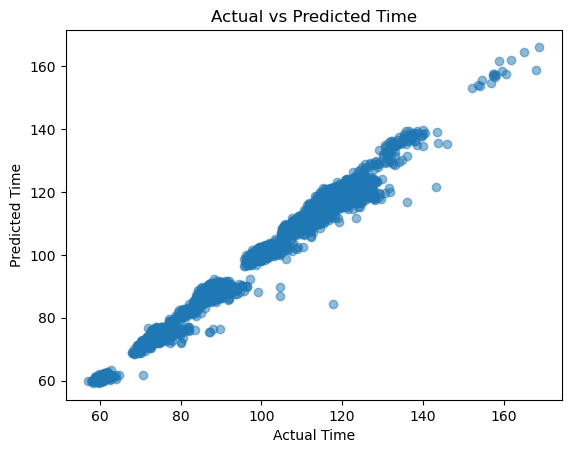

In [6]:
#オッズあり、time回帰、ホールドアウト法
trainer = Trainer_lightgbm_time()
evaluation_df = trainer.run(
    valid_start_date="2021-01-01",
    test_start_date="2023-01-01"
)

In [7]:
# オッズと人気を特徴量から省いたランク、二値、ホールドアウト法
trainer = Trainer_lightgbm_rank_niti(config_filepath="config_lightgbm_niti_odds_removed.yaml")
evaluation_df = trainer.run(
    valid_start_date="2021-01-01",
    test_start_date="2023-01-01",
    importance_filename="importance_lightgbm_rank_niti_odds_removed",
    model_filename="model_lightgbm_rank_niti_odds_removed.pkl",
    evaluation_filename="evaluation_lightgbm_rank_niti_odds_removed.csv"
)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.2201
[200]	valid_0's binary_logloss: 0.213891
[300]	valid_0's binary_logloss: 0.21105
[400]	valid_0's binary_logloss: 0.209351
[500]	valid_0's binary_logloss: 0.208321
[600]	valid_0's binary_logloss: 0.207719
[700]	valid_0's binary_logloss: 0.207274
[800]	valid_0's binary_logloss: 0.206959
[900]	valid_0's binary_logloss: 0.206672
[1000]	valid_0's binary_logloss: 0.206411
[1100]	valid_0's binary_logloss: 0.206241
[1200]	valid_0's binary_logloss: 0.206168
[1300]	valid_0's binary_logloss: 0.206052
[1400]	valid_0's binary_logloss: 0.205916
[1500]	valid_0's binary_logloss: 0.205856
[1600]	valid_0's binary_logloss: 0.205755
[1700]	valid_0's binary_logloss: 0.205579
[1800]	valid_0's binary_logloss: 0.205395
[1900]	valid_0's binary_logloss: 0.205359
[2000]	valid_0's binary_logloss: 0.205217
[2100]	valid_0's binary_logloss: 0.205156
[2200]	valid_0's binary_logloss: 0.20503
[2300]	valid_0's binary_log

,race_id,horse_id,target,rank,tansho_odds,popularity,umaban,pred
165340,202306010101,2020102562,0,3,36.1,6,1,0.034855
165341,202306010101,2020106345,0,4,4.2,2,15,0.151704
165345,202306010101,2020105491,0,8,137.1,11,16,0.032756
165350,202306010101,2020102145,0,13,83.1,9,3,0.028715
165351,202306010101,2020101415,0,14,208.6,12,7,0.007409
...,...,...,...,...,...,...,...,...
210164,202408070104,2022104287,0,8,131.9,11,10,0.038268
210165,202408070104,2022100952,0,9,4.7,2,5,0.152416
210166,202408070104,2022101984,0,10,72.0,9,3,0.013709
210167,202408070104,2022100759,0,11,79.3,10,9,0.022094


-------------------- Metrics --------------------
Log Loss: 0.2081
Accuracy: 0.7505
Precision: 0.1450
Recall: 0.6147
F1 Score: 0.2346
ROC AUC: 0.7527
test_df's binary_logloss: 0.208063835929065


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 7.52874
[200]	valid_0's rmse: 3.41015
[300]	valid_0's rmse: 2.32173
[400]	valid_0's rmse: 2.10586
[500]	valid_0's rmse: 2.04947
[600]	valid_0's rmse: 2.02383
[700]	valid_0's rmse: 2.00715
[800]	valid_0's rmse: 1.99755
[900]	valid_0's rmse: 1.99233
[1000]	valid_0's rmse: 1.99022
[1100]	valid_0's rmse: 1.99011
[1200]	valid_0's rmse: 1.98921
[1300]	valid_0's rmse: 1.98982
Early stopping, best iteration is:
[1213]	valid_0's rmse: 1.98915


,race_id,horse_id,target,rank,tansho_odds,popularity,umaban,pred
165340,202306010101,2020102562,72.9,3,36.1,6,1,74.798685
165341,202306010101,2020106345,73.4,4,4.2,2,15,74.506323
165345,202306010101,2020105491,74.1,8,137.1,11,16,74.965218
165350,202306010101,2020102145,75.0,13,83.1,9,3,74.857649
165351,202306010101,2020101415,75.1,14,208.6,12,7,75.792436
...,...,...,...,...,...,...,...,...
210164,202408070104,2022104287,76.3,8,131.9,11,10,75.632843
210165,202408070104,2022100952,76.4,9,4.7,2,5,74.631892
210166,202408070104,2022101984,77.7,10,72.0,9,3,76.029876
210167,202408070104,2022100759,78.3,11,79.3,10,9,75.673743


-------------------- Metrics --------------------
RMSE: 2.0292
値が1に近いほど良いR²: 0.9886
test_df's root_mean_squared_error: 2.029207524687867


/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


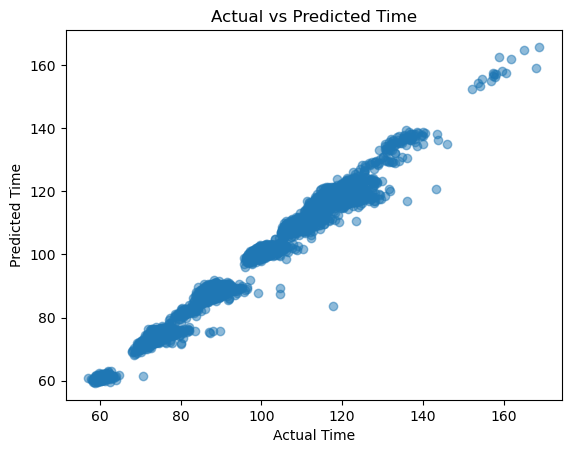

In [8]:
# オッズと人気を特徴量から省いた場合,time回帰,ホールドアウト法
trainer = Trainer_lightgbm_time(config_filepath="config_lightgbm_kaiki_odds_removed.yaml")
evaluation_df = trainer.run(
    valid_start_date="2021-01-01",
    test_start_date="2023-01-01",
    importance_filename="importance_lightgbm_time_odds_removed",
    model_filename="model_lightgbm_time_odds_removed.pkl",
    evaluation_filename="evaluation_lightgbm_time_odds_removed.csv"
)

In [9]:
# オッズと人気を特徴量から省いたランク、回帰、ホールドアウト法
trainer = Trainer_lightgbm_rank_kaiki(config_filepath="config_lightgbm_kaiki_odds_removed.yaml")
evaluation_df = trainer.run(
    valid_start_date="2021-01-01",
    test_start_date="2023-01-01",
    importance_filename="importance_lightgbm_rank_kaiki_odds_removed",
    model_filename="model_lightgbm_rank_kaiki_odds_removed.pkl",
    evaluation_filename="evaluation_lightgbm_rank_kaiki_odds_removed.csv"
)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 4.17267
[200]	valid_0's rmse: 4.03759
[300]	valid_0's rmse: 3.96916
[400]	valid_0's rmse: 3.92296
[500]	valid_0's rmse: 3.89081
[600]	valid_0's rmse: 3.87047
[700]	valid_0's rmse: 3.85779
[800]	valid_0's rmse: 3.84954
[900]	valid_0's rmse: 3.84331
[1000]	valid_0's rmse: 3.83848
[1100]	valid_0's rmse: 3.8348
[1200]	valid_0's rmse: 3.83197
[1300]	valid_0's rmse: 3.82943
[1400]	valid_0's rmse: 3.82768
[1500]	valid_0's rmse: 3.82609
[1600]	valid_0's rmse: 3.8242
[1700]	valid_0's rmse: 3.8226
[1800]	valid_0's rmse: 3.82127
[1900]	valid_0's rmse: 3.82005
[2000]	valid_0's rmse: 3.81904
[2100]	valid_0's rmse: 3.81801
[2200]	valid_0's rmse: 3.81702
[2300]	valid_0's rmse: 3.81592
[2400]	valid_0's rmse: 3.81505
[2500]	valid_0's rmse: 3.81393
[2600]	valid_0's rmse: 3.813
[2700]	valid_0's rmse: 3.81193
[2800]	valid_0's rmse: 3.81135
[2900]	valid_0's rmse: 3.81023
[3000]	valid_0's rmse: 3.80936
[3100]	valid_0's rmse:

,race_id,horse_id,target,rank,tansho_odds,popularity,umaban,pred
165340,202306010101,2020102562,3,3,36.1,6,1,8.994408
165341,202306010101,2020106345,4,4,4.2,2,15,7.177159
165345,202306010101,2020105491,8,8,137.1,11,16,9.433843
165350,202306010101,2020102145,13,13,83.1,9,3,9.406001
165351,202306010101,2020101415,14,14,208.6,12,7,12.987288
...,...,...,...,...,...,...,...,...
210164,202408070104,2022104287,8,8,131.9,11,10,7.583180
210165,202408070104,2022100952,9,9,4.7,2,5,4.386386
210166,202408070104,2022101984,10,10,72.0,9,3,8.996978
210167,202408070104,2022100759,11,11,79.3,10,9,6.840709


/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-------------------- Metrics --------------------
RMSE: 3.8811
値が1に近いほど良いR²: 0.2560
test_df's root_mean_squared_error: 3.8811165882498493


In [10]:
# オッズと人気を特徴量から省いたランク、二値、クロスバリデーション
trainer = Trainer_lightgbm_rank_niti_cv(config_filepath="config_lightgbm_niti_odds_removed.yaml")
evaluation_df = trainer.run(
    n_splits = 5,
    importance_filename="importance_lightgbm_rank_niti_cv_odds_removed",
    model_filename="model_lightgbm_rank_niti_cv_odds_removed.pkl",
    evaluation_filename="evaluation_lightgbm_rank_niti_cv_odds_removed.csv",
    final_model_filename = "model_lightgbm_rank_niti_cv_full_odds_removed.pkl"
)

Training fold 1/5...
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.20598
[200]	valid_0's binary_logloss: 0.200975
[300]	valid_0's binary_logloss: 0.198644
[400]	valid_0's binary_logloss: 0.197387
[500]	valid_0's binary_logloss: 0.1968
[600]	valid_0's binary_logloss: 0.19642
[700]	valid_0's binary_logloss: 0.196132
[800]	valid_0's binary_logloss: 0.195916
[900]	valid_0's binary_logloss: 0.195724
[1000]	valid_0's binary_logloss: 0.195651
[1100]	valid_0's binary_logloss: 0.195562
Early stopping, best iteration is:
[1067]	valid_0's binary_logloss: 0.195528
-------------------- Metrics --------------------
Accuracy: 0.7848
Precision: 0.1399
Recall: 0.5392
F1 Score: 0.2221
ROC AUC: 0.7452
Training fold 2/5...
Training until validation scores don't improve for 100 rounds
[1100]	valid_0's binary_logloss: 0.204424
[1200]	valid_0's binary_logloss: 0.204151
[1300]	valid_0's binary_logloss: 0.203979
[1400]	valid_0's binary_logloss: 0.203906
[1500]	

In [ ]:
#全体のレースを学習した際、最後のブースト回数よりも多いか確認
import lightgbm as lgb
import pickle

from pathlib import Path
DATA_DIR = Path("..", "data")
INPUT_DIR = DATA_DIR / "02_features"
OUTPUT_DIR = DATA_DIR / "03_train"

# モデルの読み込み
with open(OUTPUT_DIR/"model_lightgbm_rank_niti_cv_full_odds_removed.pkl", "rb") as f:
    model = pickle.load(f)

# ブースト回数の取得
num_trees = model.num_trees()

print(f"ブースト回数（num_boost_round）: {num_trees}")

In [13]:
# オッズと人気を特徴量から省いたランク、回帰、クロスバリデーション
trainer = Trainer_lightgbm_rank_kaiki_cv(config_filepath="config_lightgbm_kaiki_odds_removed.yaml")
evaluation_df = trainer.run(
    n_splits = 5,
    importance_filename="importance_lightgbm_rank_kaiki_cv_odds_removed",
    model_filename="model_lightgbm_rank_kaiki_cv_odds_removed.pkl",
    evaluation_filename="evaluation_lightgbm_rank_kaiki_cv_odds_removed.csv",
    final_model_filename = "model_lightgbm_rank_kaiki_cv_full_odds_removed.pkl"
)

Training fold 1/5...
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 4.2789
[200]	valid_0's rmse: 4.15206
[300]	valid_0's rmse: 4.09712
[400]	valid_0's rmse: 4.06243
[500]	valid_0's rmse: 4.03625
[600]	valid_0's rmse: 4.01928
[700]	valid_0's rmse: 4.00696
[800]	valid_0's rmse: 3.9987
[900]	valid_0's rmse: 3.99357
[1000]	valid_0's rmse: 3.9894
[1100]	valid_0's rmse: 3.98659
[1200]	valid_0's rmse: 3.98244
[1300]	valid_0's rmse: 3.98
[1400]	valid_0's rmse: 3.97743
[1500]	valid_0's rmse: 3.97484
[1600]	valid_0's rmse: 3.97308
[1700]	valid_0's rmse: 3.9713
[1800]	valid_0's rmse: 3.97003
[1900]	valid_0's rmse: 3.96896
[2000]	valid_0's rmse: 3.96778
[2100]	valid_0's rmse: 3.96681
[2200]	valid_0's rmse: 3.96606
[2300]	valid_0's rmse: 3.96523
[2400]	valid_0's rmse: 3.96419
[2500]	valid_0's rmse: 3.96349
[2600]	valid_0's rmse: 3.96266
[2700]	valid_0's rmse: 3.96127
[2800]	valid_0's rmse: 3.96021
[2900]	valid_0's rmse: 3.95966
[3000]	valid_0's rmse: 3.95916
[31

/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-------------------- Metrics --------------------
RMSE: 3.9457
値が1に近いほど良いR²: 0.2310
test_df's root_mean_squared_error: 3.9457091274815417
Training fold 2/5...
Training until validation scores don't improve for 100 rounds
[6200]	valid_0's rmse: 3.8995
[6300]	valid_0's rmse: 3.89605
[6400]	valid_0's rmse: 3.89402
[6500]	valid_0's rmse: 3.89286
[6600]	valid_0's rmse: 3.8917
[6700]	valid_0's rmse: 3.89097
[6800]	valid_0's rmse: 3.89038
[6900]	valid_0's rmse: 3.88997
[7000]	valid_0's rmse: 3.88943
[7100]	valid_0's rmse: 3.88877
[7200]	valid_0's rmse: 3.88837
[7300]	valid_0's rmse: 3.88775
[7400]	valid_0's rmse: 3.88705
[7500]	valid_0's rmse: 3.88639
[7600]	valid_0's rmse: 3.88579
[7700]	valid_0's rmse: 3.88531
[7800]	valid_0's rmse: 3.88527
[7900]	valid_0's rmse: 3.88477
[8000]	valid_0's rmse: 3.88446
[8100]	valid_0's rmse: 3.88427
[8200]	valid_0's rmse: 3.88385
[8300]	valid_0's rmse: 3.88385
Early stopping, best iteration is:
[8246]	valid_0's rmse: 3.88374


/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-------------------- Metrics --------------------
RMSE: 3.8837
値が1に近いほど良いR²: 0.2518
test_df's root_mean_squared_error: 3.8837403915838644
Training fold 3/5...
Training until validation scores don't improve for 100 rounds
[8300]	valid_0's rmse: 3.81188
[8400]	valid_0's rmse: 3.81007
[8500]	valid_0's rmse: 3.80869
[8600]	valid_0's rmse: 3.80907
Early stopping, best iteration is:
[8538]	valid_0's rmse: 3.80839


/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-------------------- Metrics --------------------
RMSE: 3.8084
値が1に近いほど良いR²: 0.2700
test_df's root_mean_squared_error: 3.808390501184435
Training fold 4/5...
Training until validation scores don't improve for 100 rounds
[8600]	valid_0's rmse: 3.88127
[8700]	valid_0's rmse: 3.87946
[8800]	valid_0's rmse: 3.87853
[8900]	valid_0's rmse: 3.87783
[9000]	valid_0's rmse: 3.87695
[9100]	valid_0's rmse: 3.87581
[9200]	valid_0's rmse: 3.87535
[9300]	valid_0's rmse: 3.87478
[9400]	valid_0's rmse: 3.87411
[9500]	valid_0's rmse: 3.87352
[9600]	valid_0's rmse: 3.8732
[9700]	valid_0's rmse: 3.87271
[9800]	valid_0's rmse: 3.8721
[9900]	valid_0's rmse: 3.87149
[10000]	valid_0's rmse: 3.87116
[10100]	valid_0's rmse: 3.87061
[10200]	valid_0's rmse: 3.87008
[10300]	valid_0's rmse: 3.86964
[10400]	valid_0's rmse: 3.86917
[10500]	valid_0's rmse: 3.86861
[10600]	valid_0's rmse: 3.86819
[10700]	valid_0's rmse: 3.86798
[10800]	valid_0's rmse: 3.86753
[10900]	valid_0's rmse: 3.86708
[11000]	valid_0's rmse: 3.86

/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-------------------- Metrics --------------------
RMSE: 3.8627
値が1に近いほど良いR²: 0.2624
test_df's root_mean_squared_error: 3.8627377172755577
Training final model using all data...
Final model training completed.


In [4]:
# オッズと人気を特徴量から省いたランク、回帰、クロスバリデーション
trainer = Trainer_lightgbm_time_cv(config_filepath="config_lightgbm_kaiki_odds_removed.yaml")
evaluation_df = trainer.run(
    n_splits = 5,
    importance_filename="importance_lightgbm_time_cv_odds_removed",
    model_filename="model_lightgbm_time_cv_odds_removed.pkl",
    evaluation_filename="evaluation_lightgbm_time_cv_odds_removed.csv",
    final_model_filename = "model_lightgbm_time_cv_full_odds_removed.pkl"
)

Training fold 1/5...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28109
[LightGBM] [Info] Number of data points in the train set: 42042, number of used features: 177
[LightGBM] [Info] Start training from score 96.302174
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 7.27221
[200]	valid_0's rmse: 3.32453
[300]	valid_0's rmse: 2.28595
[400]	valid_0's rmse: 2.09023
[500]	valid_0's rmse: 2.05278
[600]	valid_0's rmse: 2.0439
[700]	valid_0's rmse: 2.03875
[800]	valid_0's rmse: 2.03209
[900]	valid_0's rmse: 2.03054
[1000]	valid_0's rmse: 2.03011
Early stopping, best iteration is:
[942]	valid_0's rmse: 2.02961


/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-------------------- Metrics --------------------
RMSE: 2.0296
値が1に近いほど良いR²: 0.9886
test_df's root_mean_squared_error: 2.0296129567653685
Training fold 2/5...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28776
[LightGBM] [Info] Number of data points in the train set: 84084, number of used features: 177
Training until validation scores don't improve for 100 rounds
[1000]	valid_0's rmse: 1.94657
[1100]	valid_0's rmse: 1.94404
[1200]	valid_0's rmse: 1.9361
[1300]	valid_0's rmse: 1.9324
[1400]	valid_0's rmse: 1.93304
Early stopping, best iteration is:
[1327]	valid_0's rmse: 1.93155


/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-------------------- Metrics --------------------
RMSE: 1.9316
値が1に近いほど良いR²: 0.9900
test_df's root_mean_squared_error: 1.931551845759525
Training fold 3/5...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28940
[LightGBM] [Info] Number of data points in the train set: 126126, number of used features: 177
Training until validation scores don't improve for 100 rounds
[1400]	valid_0's rmse: 2.04997
[1500]	valid_0's rmse: 2.03667
[1600]	valid_0's rmse: 2.0334
[1700]	valid_0's rmse: 2.03084
[1800]	valid_0's rmse: 2.03035
[1900]	valid_0's rmse: 2.02945
[2000]	valid_0's rmse: 2.02831
[2100]	valid_0's rmse: 2.02741
[2200]	valid_0's rmse: 2.02543
[2300]	valid_0's rmse: 2.02518
[2400]	valid_0's rmse: 2.02596
Early stopping, best iteration is:
[2319]	valid_0's rmse: 2.02494


/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-------------------- Metrics --------------------
RMSE: 2.0249
値が1に近いほど良いR²: 0.9891
test_df's root_mean_squared_error: 2.024942940277944
Training fold 4/5...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29041
[LightGBM] [Info] Number of data points in the train set: 168168, number of used features: 177
Training until validation scores don't improve for 100 rounds
[2400]	valid_0's rmse: 2.03027
[2500]	valid_0's rmse: 2.02557
[2600]	valid_0's rmse: 2.02448
[2700]	valid_0's rmse: 2.02453
[2800]	valid_0's rmse: 2.02441
Early stopping, best iteration is:
[2741]	valid_0's rmse: 2.02429


/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-------------------- Metrics --------------------
RMSE: 2.0243
値が1に近いほど良いR²: 0.9886
test_df's root_mean_squared_error: 2.0242931900028664
Training final model using all data...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29172
[LightGBM] [Info] Number of data points in the train set: 210210, number of used features: 177
Final model training completed.


# 精度評価
- popは人気列にかけた場合の回収率、的中率です
- topnはそのモデルが評価した上からn番目にかけた場合の的中回収です
- 例えばtop4の馬単にかけた場合上から4つの馬をかけた、4*3=12通りの的中率、回収率を計算します
- なので、馬単と馬連などの的中率は同じになりますが、回収率は変わります

In [15]:
#オッズあり、ランク、二値、ホールドアウト
evaluator = Evaluator_lightgbm_rank_niti()
summary_df_gbm = evaluator.summarize_box_exp(exp_name="lightgbm_rank_niti")
summary_df_gbm

,topn,bet_type,hitrate_lightgbm_rank_niti,returnrate_lightgbm_rank_niti,hitrate_pop,returnrate_pop
0,1,単勝,0.131830,0.859198,0.127820,0.831629
1,1,複勝,0.279699,0.680752,0.271679,0.657945
2,2,ワイド,0.046115,0.275890,0.042105,0.256992
3,2,単勝,0.169424,0.668421,0.167419,0.667243
4,2,複勝,0.344361,0.535363,0.343358,0.524010
5,2,馬単,0.021554,0.299098,0.017043,0.259499
6,2,馬連,0.021554,0.304211,0.017043,0.264311
7,3,ワイド,0.088221,0.288237,0.083208,0.276291
8,3,三連単,0.007018,0.161328,0.006516,0.148079
9,3,三連複,0.007018,0.232180,0.006516,0.223960


In [16]:
# オッズあり、ランク、回帰、ホールドアウト
evaluator = Evaluator_lightgbm_rank_kaiki(evaluation_filename="evaluation_lightgbm_rank_kaiki.csv")
summary_df_noodds_time = evaluator.summarize_box_exp(exp_name="lightgbm_rank_kaiki")
summary_df_noodds_time

,topn,bet_type,hitrate_lightgbm_rank_kaiki,returnrate_lightgbm_rank_kaiki,hitrate_pop,returnrate_pop
0,1,単勝,0.132832,0.913835,0.127820,0.831629
1,1,複勝,0.279198,0.690025,0.271679,0.657945
2,2,ワイド,0.049624,0.293333,0.042105,0.256992
3,2,単勝,0.170426,0.671053,0.167419,0.667243
4,2,複勝,0.344361,0.543033,0.343358,0.524010
5,2,馬単,0.022556,0.269799,0.017043,0.259499
6,2,馬連,0.022556,0.286917,0.017043,0.264311
7,3,ワイド,0.086717,0.292715,0.083208,0.276291
8,3,三連単,0.007018,0.160902,0.006516,0.148079
9,3,三連複,0.007018,0.236591,0.006516,0.223960


In [17]:
# オッズあり、タイム、回帰、ホールドアウト
evaluator = Evaluator_lightgbm_time_kaiki(evaluation_filename="evaluation_lightgbm_time.csv")
summary_df_time = evaluator.summarize_box_exp(exp_name="lightgbm_time")
summary_df_time

,topn,bet_type,hitrate_lightgbm_time,returnrate_lightgbm_time,hitrate_pop,returnrate_pop
0,1,単勝,0.130326,0.923058,0.127820,0.831629
1,1,複勝,0.280201,0.694737,0.271679,0.657945
2,2,ワイド,0.050125,0.306115,0.042105,0.256992
3,2,単勝,0.174436,0.727970,0.167419,0.667243
4,2,複勝,0.345865,0.559323,0.343358,0.524010
5,2,馬単,0.023058,0.309023,0.017043,0.259499
6,2,馬連,0.023058,0.319098,0.017043,0.264311
7,3,ワイド,0.089223,0.325898,0.083208,0.276291
8,3,三連単,0.008521,0.338262,0.006516,0.148079
9,3,三連複,0.008521,0.403358,0.006516,0.223960


In [18]:
# オッズと人気を特徴量から省いた場合、ランク、二値、ホールドアウト
evaluator = Evaluator_lightgbm_rank_niti(evaluation_filename="evaluation_lightgbm_rank_niti_odds_removed.csv")
summary_df_noodds_gbm = evaluator.summarize_box_exp(exp_name="lightgbm_rank_niti_noodds")
summary_df_noodds_gbm

,topn,bet_type,hitrate_lightgbm_rank_niti_noodds,returnrate_lightgbm_rank_niti_noodds,hitrate_pop,returnrate_pop
0,1,単勝,0.106767,0.841103,0.127820,0.831629
1,1,複勝,0.245614,0.682957,0.271679,0.657945
2,2,ワイド,0.036090,0.323058,0.042105,0.256992
3,2,単勝,0.151880,0.653709,0.167419,0.667243
4,2,複勝,0.317794,0.541604,0.343358,0.524010
5,2,馬単,0.015038,0.327945,0.017043,0.259499
6,2,馬連,0.015038,0.327920,0.017043,0.264311
7,3,ワイド,0.064160,0.213985,0.083208,0.276291
8,3,三連単,0.002506,0.078262,0.006516,0.148079
9,3,三連複,0.002506,0.121053,0.006516,0.223960


In [19]:
# オッズと人気を特徴量から省いた場合,ランク、回帰、ホールドアウト
evaluator = Evaluator_lightgbm_rank_kaiki(evaluation_filename="evaluation_lightgbm_rank_kaiki_odds_removed.csv")
summary_df_noodds_time = evaluator.summarize_box_exp(exp_name="lightgbm_rank_kaiki_noodds")
summary_df_noodds_time

,topn,bet_type,hitrate_lightgbm_rank_kaiki_noodds,returnrate_lightgbm_rank_kaiki_noodds,hitrate_pop,returnrate_pop
0,1,単勝,0.109273,0.847218,0.127820,0.831629
1,1,複勝,0.253133,0.732982,0.271679,0.657945
2,2,ワイド,0.033584,0.382757,0.042105,0.256992
3,2,単勝,0.148371,0.632657,0.167419,0.667243
4,2,複勝,0.323810,0.554110,0.343358,0.524010
5,2,馬単,0.015539,0.558897,0.017043,0.259499
6,2,馬連,0.015539,0.674887,0.017043,0.264311
7,3,ワイド,0.069173,0.270760,0.083208,0.276291
8,3,三連単,0.003509,0.189499,0.006516,0.148079
9,3,三連複,0.003509,0.313233,0.006516,0.223960


In [20]:
# オッズと人気を特徴量から省いた場合,タイム、回帰、ホールドアウト
evaluator = Evaluator_lightgbm_time_kaiki(evaluation_filename="evaluation_lightgbm_time_odds_removed.csv")
evaluator.summarize_box_top_n(n=3,save_filename="box_summary_time_noodds_top3.csv")
summary_df_noodds_time = evaluator.summarize_box_exp(exp_name="lightgbm_time_noodds")
summary_df_noodds_time

,topn,bet_type,hitrate_lightgbm_time_noodds,returnrate_lightgbm_time_noodds,hitrate_pop,returnrate_pop
0,1,単勝,0.109774,0.853033,0.127820,0.831629
1,1,複勝,0.241604,0.664962,0.271679,0.657945
2,2,ワイド,0.033584,0.309273,0.042105,0.256992
3,2,単勝,0.149373,0.662331,0.167419,0.667243
4,2,複勝,0.320301,0.548020,0.343358,0.524010
5,2,馬単,0.016541,0.382431,0.017043,0.259499
6,2,馬連,0.016541,0.434236,0.017043,0.264311
7,3,ワイド,0.073183,0.293133,0.083208,0.276291
8,3,三連単,0.004010,0.176967,0.006516,0.148079
9,3,三連複,0.004010,0.303409,0.006516,0.223960


In [21]:
# オッズと人気を特徴量から省いた場合_ランク、二値、クロスバリデーション（最終番目）
evaluator = Evaluator_lightgbm_rank_niti_cross(evaluation_filename="evaluation_lightgbm_rank_niti_cv_odds_removed.csv")
evaluator.summarize_box_top_n(n=3,save_filename="box_summary_rank_niti_cross_noodds_top3.csv")
summary_df_noodds_gbm = evaluator.summarize_box_exp(exp_name="lightgbm_rank_niti_cross_noodds")
summary_df_noodds_gbm

,topn,bet_type,hitrate_lightgbm_rank_niti_cross_noodds,returnrate_lightgbm_rank_niti_cross_noodds,hitrate_pop,returnrate_pop
0,1,単勝,0.103701,0.863671,0.123627,0.786268
1,1,複勝,0.239664,0.736072,0.272468,0.699526
2,2,ワイド,0.034702,0.426881,0.050020,0.352894
3,2,単勝,0.146943,0.687671,0.168226,0.658913
4,2,複勝,0.321675,0.590416,0.346211,0.568869
5,2,馬単,0.014640,0.503782,0.022231,0.430473
6,2,馬連,0.014640,0.494252,0.022231,0.379775
7,3,ワイド,0.072658,0.330907,0.087976,0.293105
8,3,三連単,0.004202,0.128819,0.008676,0.119992
9,3,三連複,0.004202,0.153721,0.008676,0.146618


In [22]:
# オッズと人気を特徴量から省いた場合_ランク、回帰、クロスバリデーション（最終番目）
evaluator = Evaluator_lightgbm_rank_kaiki(evaluation_filename="evaluation_lightgbm_rank_kaiki_cv_odds_removed.csv")
evaluator.summarize_box_top_n(n=3,save_filename="box_summary_rank_kaiki_cross_noodds_top3.csv")
summary_df_noodds_gbm = evaluator.summarize_box_exp(exp_name="lightgbm_rank_kaiki_cross_noodds")
summary_df_noodds_gbm

,topn,bet_type,hitrate_lightgbm_rank_kaiki_cross_noodds,returnrate_lightgbm_rank_kaiki_cross_noodds,hitrate_pop,returnrate_pop
0,1,単勝,0.102481,0.856947,0.123627,0.786268
1,1,複勝,0.245493,0.778569,0.272468,0.699526
2,2,ワイド,0.038091,0.440789,0.050020,0.352894
3,2,単勝,0.148841,0.710648,0.168226,0.658913
4,2,複勝,0.326962,0.606242,0.346211,0.568869
5,2,馬単,0.017487,0.521140,0.022231,0.430473
6,2,馬連,0.017487,0.495581,0.022231,0.379775
7,3,ワイド,0.074420,0.359943,0.087976,0.293105
8,3,三連単,0.004880,0.207794,0.008676,0.119992
9,3,三連複,0.004880,0.225214,0.008676,0.146618


In [5]:
# オッズと人気を特徴量から省いた場合_time、回帰、クロスバリデーション（最終番目）
evaluator = Evaluator_lightgbm_time_kaiki(evaluation_filename="evaluation_lightgbm_time_cv_odds_removed.csv")
evaluator.summarize_box_top_n(n=3,save_filename="box_summary_time_cross_noodds_top3.csv")
summary_df_noodds_gbm = evaluator.summarize_box_exp(exp_name="lightgbm_time_cross_noodds")
summary_df_noodds_gbm

,topn,bet_type,hitrate_lightgbm_time_cross_noodds,returnrate_lightgbm_time_cross_noodds,hitrate_pop,returnrate_pop
0,1,単勝,0.105056,0.901776,0.123627,0.786268
1,1,複勝,0.244408,0.772780,0.272468,0.699526
2,2,ワイド,0.039854,0.482473,0.050020,0.352894
3,2,単勝,0.147485,0.701152,0.168226,0.658913
4,2,複勝,0.322489,0.619534,0.346211,0.568869
5,2,馬単,0.016267,0.379897,0.022231,0.430473
6,2,馬連,0.016267,0.405354,0.022231,0.379775
7,3,ワイド,0.075912,0.379400,0.087976,0.293105
8,3,三連単,0.004880,0.134592,0.008676,0.119992
9,3,三連複,0.004880,0.185712,0.008676,0.146618


# 予測当日の処理

## 事前準備
**当日出走馬が確定した時点**で実行できる

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [ ]:
# 当日出走馬の過去成績テーブルの前処理_そのままで使えない未加工のデータを加工する
horse_results_preprocessed = preprocessing.process_horse_results(
    input_filename="horse_results_prediction.csv",
    output_filename="horse_results_prediction.csv"
)
horse_results_preprocessed

In [ ]:
population = create_population.create(from_="2016-01-01", to_="2024-11-31")

In [ ]:
# 当日出走馬の血統テーブルの前処理
peds_preprocessed = preprocessing.process_peds(
    input_filename="peds_prediction.csv",
    output_filename="peds_prediction.csv"
)
peds_preprocessed

In [ ]:
pfc = PredictionFeatureCreator()
# 過去成績集計は事前に行うことができる
pfc.create_baselog()
pfc.agg_horse_n_races()
pfc.agg_horse_n_races_relative()
pfc.agg_horse_n_races_df

In [ ]:
# レース結果テーブルの前処理
results_preprocessed = condition_prediction.process_results()
# レース情報テーブルの前処理
race_info_preprocessed = condition_prediction.process_race_info()
create_race_grade_preprocessed = condition_prediction.create_race_grade()


## 当日の予測処理
レース直前出走直前に実行する

In [ ]:
#当日にやらないと、天気や馬場状態がわからないので、当日に実行してください、
# 特徴量の更新
features = pfc.create_features(
    race_id="202408060411",  # 予測するレースidを指定
    date_content_a = "2024年11月10日", #"%Y年%m月%d日"形式で該当レース当日の日付を入れてください    
    skip_agg_horse=True  # 事前に集計した場合はスキップできる
)

In [ ]:
pfc.results

In [ ]:
pfc.race_info

### pred列は全て降順（大きい順）で表示されます
### 二値予測のrankはpred列が大きい順で評価がよく、回帰のrankとtimeは小さい順で評価が良いです
### 順番が逆になっているので気をつけてください

In [ ]:
# 予測/オッズあり、ランク、二値、ホールドアウト
prediction.predict(features)

In [ ]:
# オッズ除外モデルでの予測、ランク、二値、ホールドアウト
prediction.predict(
    features,
    model_filename="model_lightgbm_rank_niti_odds_removed.pkl",
    config_filepath="config_lightgbm_niti_odds_removed.yaml"
)

In [ ]:
# オッズあり予測、ランク、二値、ホールドアウト
prediction.predict(
    features,
    model_filename="model_lightgbm_rank_kaiki.pkl",
    config_filepath="config_lightgbm_kaiki.yaml"
)

In [ ]:
# オッズ除外モデルでの予測、ランク、回帰、ホールドアウト
prediction.predict(
    features,
    model_filename="model_lightgbm_rank_kaiki_odds_removed.pkl",
    config_filepath="config_lightgbm_kaiki_odds_removed.yaml"
)

In [ ]:
# オッズありtimeモデルでの予測、ホールドアウト
prediction.predict(
    features,
    model_filename="model_lightgbm_time.pkl",
    config_filepath="config_lightgbm_kaiki.yaml"
)

In [ ]:
# オッズ除外モデルでの予測、time、ホールドアウト
prediction.predict(
    features,
    model_filename="model_lightgbm_time_odds_removed.pkl",
    config_filepath="config_lightgbm_kaiki_odds_removed.yaml"
)

In [ ]:
# オッズ除外モデルでの予測、ランク、二値、クロスバリデーション
prediction.predict(
    features,
    model_filename="model_lightgbm_rank_niti_cv_full_odds_removed.pkl",
    config_filepath="config_lightgbm_niti_odds_removed.yaml"
)

In [ ]:
# オッズ除外モデルでの予測、ランク、回帰、クロスバリデーション
prediction.predict(
    features,
    model_filename="model_lightgbm_rank_kaiki_cv_full_odds_removed.pkl",
    config_filepath="config_lightgbm_kaiki_odds_removed.yaml"
)

In [ ]:
# オッズ除外モデルでの予測、time、クロスバリデーション
prediction.predict(
    features,
    model_filename="model_lightgbm_time_cv_full_odds_removed.pkl",
    config_filepath="config_lightgbm_kaiki_odds_removed.yaml"
)